# Assignment 7: Data Curation and Analysis (Coding)

*In this assignment, I have constructed and analyzed data that I scraped from Wikipedia as well as published my file to [data.world](https://data.world).*

**Deadline is Wednesday, March 1 at 11:59pm**

### Importing libraries
- check if BeautifulSoup and pandas are already installed
- if not, install it and then import

In [1]:
try:
    from bs4 import BeautifulSoup
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("BeautifulSoup, Pandas, NumPy, SciPy, and MatPlotLib are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} scipy
    !conda install --yes --prefix {sys.prefix} matplotlib
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup, Pandas, NumPy, SciPy, and MatPlotLib were not found. Installed them and imported")

import requests

BeautifulSoup, Pandas, NumPy, SciPy, and MatPlotLib are already installed and imported


### Read the website
- link directs to the page subsection I want
- open the webpage
- parse through the table with BeautifulSoup

In [2]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/2017–18_ISU_World_Standings#Men's_singles_(213_skaters)")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


### Perform ETL
- extract:
    - get data from different sources efficiently
- transform:
    - perform transformations/calculations on data
- load:
    - load the data into the target storage

### ETL: Extract:
- create a variable with BeautifulSoup that contains the table with the information
- print the raw data

In [3]:
wikiurl = "https://en.wikipedia.org/wiki/2017–18_ISU_World_Standings#Men's_singles_(213_skaters)"
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(wikiurl)
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
ranks = soup.find('table',{'class':"wikitable"})
print(ranks)

200
<table class="wikitable sortable" style="text-align: center;">
<tbody><tr>
<th rowspan="2">Rank
</th>
<th rowspan="2">Nation
</th>
<th rowspan="2">Skater
</th>
<th rowspan="2">Points
</th>
<th rowspan="2">Season
</th>
<th>ISU <br/> Championships <br/> or Olympics
</th>
<th colspan="2">(Junior) Grand <br/> Prix and Final
</th>
<th colspan="2">Selected <br/> International <br/> Competition
</th></tr>
<tr>
<th>Best
</th>
<th>Best
</th>
<th>2nd Best
</th>
<th>Best
</th>
<th>2nd Best
</th></tr>
<tr>
<td rowspan="3">1</td>
<td rowspan="3" style="text-align: left;"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/23px-Flag_of_Japan.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/35px-Flag_of_Japan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/45px-Flag_of_Japan.svg.png 2x" wi

### ETL: Transform:
- convert the raw data into a python DataFrame using the read_html() function

In [4]:
df = pd.read_html(str(ranks), skiprows=0)
df = pd.DataFrame(df[0])
print(df.head())

  Rank Nation        Skater Points                   Season  \
  Rank Nation        Skater Points                   Season   
0    1    JPN  Yuzuru Hanyu   5265  2017/2018 season (100%)   
1    1    JPN  Yuzuru Hanyu   5265  2016/2017 season (100%)   
2    1    JPN  Yuzuru Hanyu   5265   2015/2016 season (70%)   
3    2    JPN     Shoma Uno   5121  2017/2018 season (100%)   
4    2    JPN     Shoma Uno   5121  2016/2017 season (100%)   

  ISU Championships or Olympics (Junior) Grand Prix and Final           \
                           Best                          Best 2nd Best   
0                          1200                           360        0   
1                          1200                           800      400   
2                           756                           560      280   
3                          1080                           720      400   
4                          1080                           648      400   

  Selected International Competition   

### ETL: Transform (cont'd):
- remove the irrelevant columns

In [5]:
data = df.drop(columns=["Season", "ISU Championships or Olympics", "(Junior) Grand Prix and Final", "Selected International Competition"], axis=1)
print(data.head())

  Rank Nation        Skater Points
  Rank Nation        Skater Points
0    1    JPN  Yuzuru Hanyu   5265
1    1    JPN  Yuzuru Hanyu   5265
2    1    JPN  Yuzuru Hanyu   5265
3    2    JPN     Shoma Uno   5121
4    2    JPN     Shoma Uno   5121


/var/folders/d0/dfk43c193j57jzb6jh2yf3sc0000gn/T/ipykernel_32550/2577681246.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = df.drop(columns=["Season", "ISU Championships or Olympics", "(Junior) Grand Prix and Final", "Selected International Competition"], axis=1)


### ETL: Transform (cont'd):
- remove the duplicate rows
- check how many duplicates there are

In [6]:
number_of_duplicates = data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

data = data.drop_duplicates()

number_of_duplicates = data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 426
 Number of duplicates after removing : 0


### ETL: Transform (cont'd):
- remove the extra header column
- retrieve information about the dataframe
- check for and delete rows with null entries

In [7]:
data.columns = data.columns.droplevel(1)
print(data.head())

    Rank Nation            Skater  Points
0      1    JPN      Yuzuru Hanyu    5265
3      2    JPN         Shoma Uno    5121
6      3    USA       Nathan Chen    4920
9      4    RUS   Mikhail Kolyada    4181
12     5    ESP  Javier Fernandez    4034


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 636
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    213 non-null    int64 
 1   Nation  213 non-null    object
 2   Skater  213 non-null    object
 3   Points  213 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.3+ KB


In [9]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 636
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    213 non-null    int64 
 1   Nation  213 non-null    object
 2   Skater  213 non-null    object
 3   Points  213 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.3+ KB


### Describe:
- describe the "Points" column
- observe the count, mean, minimum, maximum, standard deviation, etc

In [10]:
data["Points"].describe()

count     213.000000
mean      911.624413
std      1020.791836
min        34.000000
25%       203.000000
50%       521.000000
75%      1136.000000
max      5265.000000
Name: Points, dtype: float64

### Describe:
- display the "Points" column as a histogram

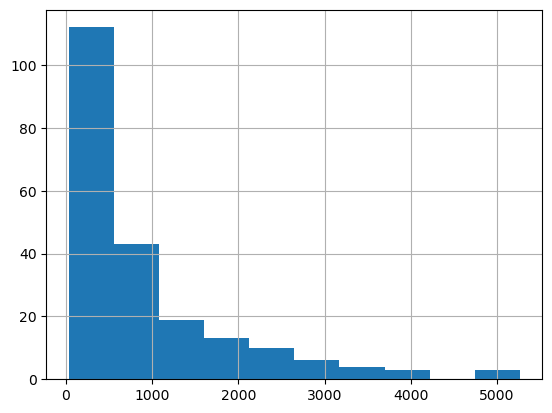

In [11]:
hist = data["Points"].hist(bins=10)

### Observe:
- observe the histogram as well as its shape (tail direction, skewing, spread, etc)
- the histogram is right-skewed, with a long tail on the left side of the graph
- there are more than 100 skaters who had a ranking score of 0-500
- there are three skaters who had a ranking score of 4000-5000
- there are two skaters who had a ranking score of 5000+

### Describe:
- create a list of unique countries
- store the counts for each country
- display the "Nations" column and frequency of each nation as a bar graph

Text(0.5, 1.0, '2017-18 ISU Number of Skaters per Country')

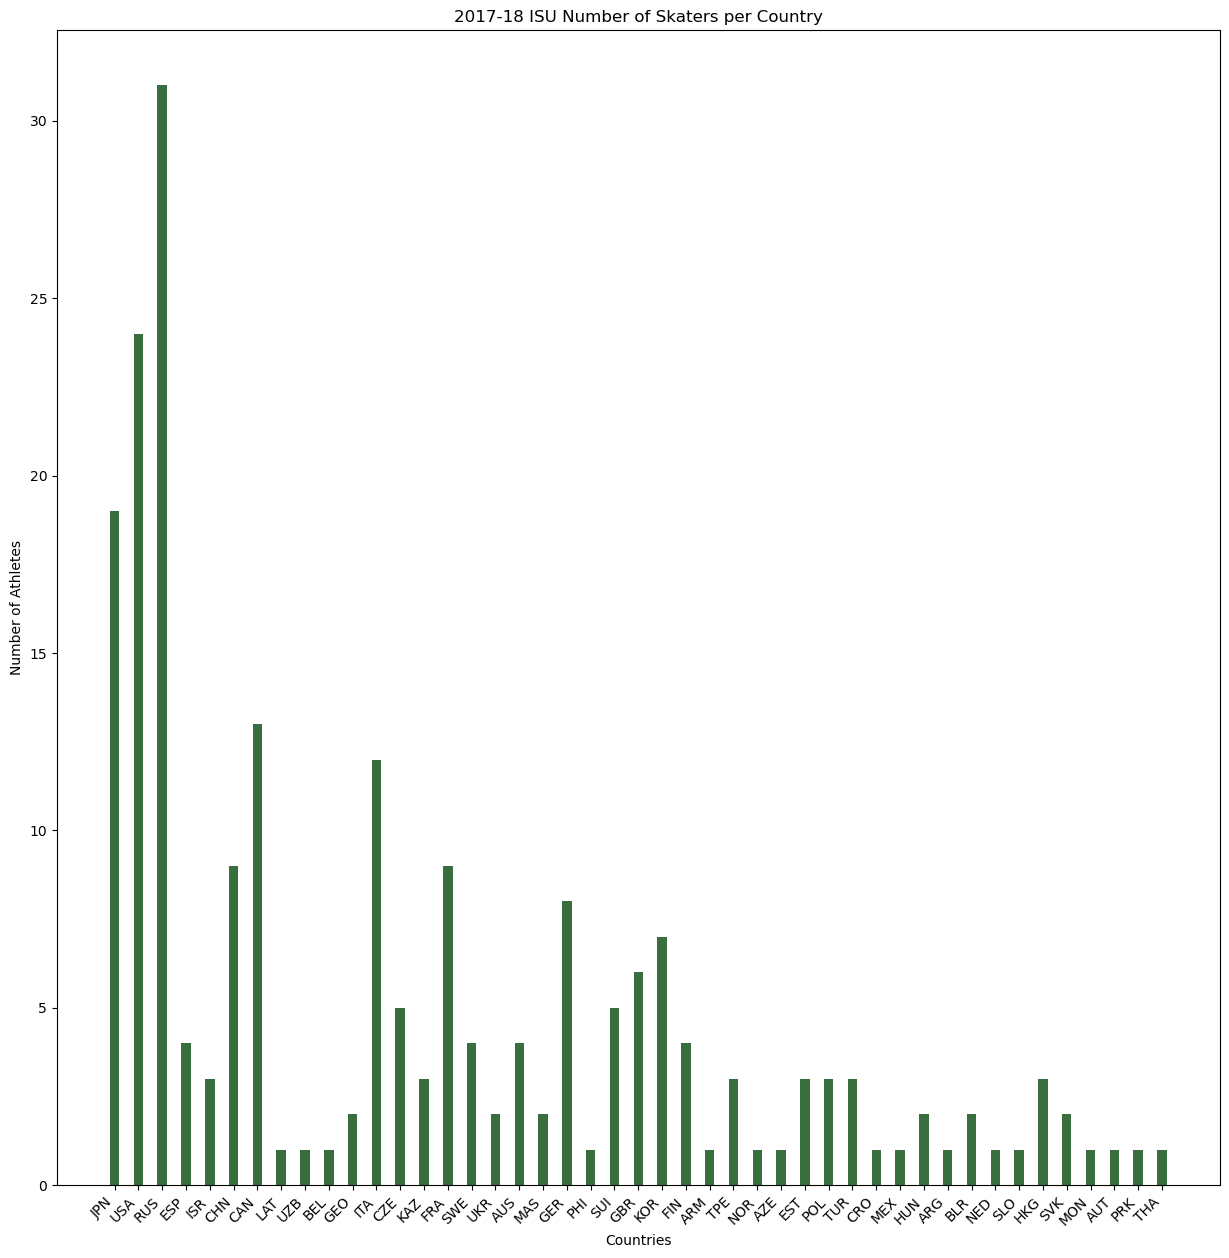

In [12]:
countries_df = data["Nation"]
countries = []

selected_countries = []
country_counter = []

for country in countries_df:
    countries.append(country)
    if selected_countries.count(country) == 0:
        selected_countries.append(country)

for country in selected_countries:
    country_counter.append(countries.count(country))

plt.figure(figsize=(15, 15))

plt.xticks(rotation=45, ha='right')
plt.bar(selected_countries, country_counter, color = "#396E3E", width = 0.4)

plt.xlabel("Countries")
plt.ylabel("Number of Athletes")

plt.title("2017-18 ISU Number of Skaters per Country")

### Observe:
- the top three countries who have the most active skaters are Japan ("JPN"), United States ("USA"), and Russia ("RUS")
- Russia has the most active skaters, followed by the United States, followed by Japan
- many countries only have one active skater, such as Latvia ("LAT"), Uzbekistan ("UZB"), Philippines ("PHI"), Azerbaijan ("AZE"), and Thailand ("THA")

### Describe:
- display the "Rank" and "Points" columns for each skater as a scatterplot

Text(0.5, 1.0, '2017-18 ISU World Standings Skater Rank and Points')

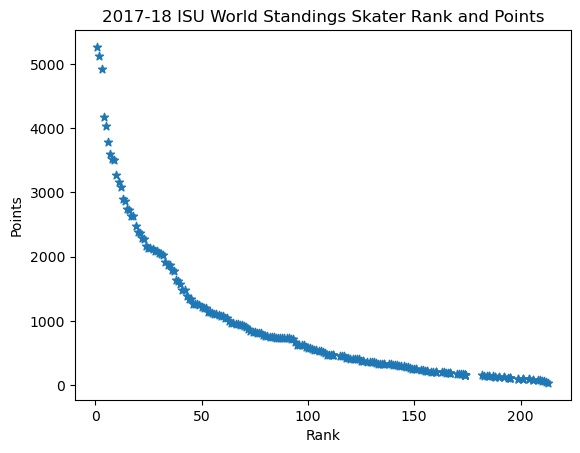

In [13]:
rank_col = data["Rank"]
points_col = data["Points"]

plt.scatter(rank_col, points_col, marker="*")

plt.xlabel("Rank")
plt.ylabel("Points")

plt.title("2017-18 ISU World Standings Skater Rank and Points")

### Observe:
- as the rank number goes up (actual rank goes down), the less points the skater has
- the graph resembles an exponential graph with a rate of growth that is less than 1
- with lower rank numbers (higher actual ranks), the points are more dispersed and far apart
- with higher rank numbers (lower actual ranks), the points are closer and crowded together

### Describe:
- display the "Points" column for each skater as a box plot

Text(0, 0.5, 'Total points')

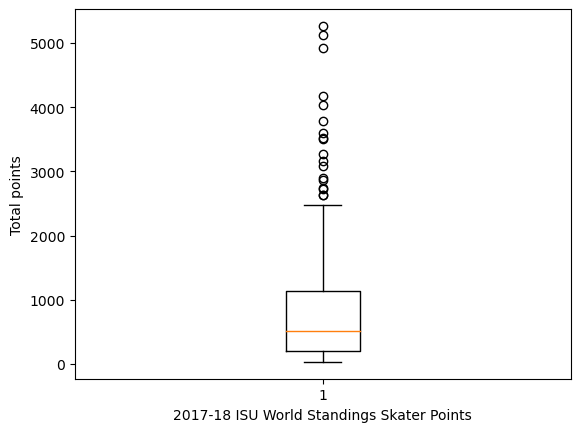

In [14]:
points_col = data["Points"]

plt.boxplot(points_col)

plt.xlabel("2017-18 ISU World Standings Skater Points")
plt.ylabel("Total points")

### Observe:
- the mean, median, and quartiles are centered around the 1000 mark value
- there are no outliers on the lower end, but there are many on the upper end

### ETL: Load:
- store the DataFrame table that we created on our local disk in .csv format so that we can use it later

In [15]:
data.to_csv("2017-18_ISU_World_Standings_Singles_Men.csv")